<a href="https://colab.research.google.com/github/MatheusSC017/IrisClassification_SKLearn/blob/main/IrisData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Data

## Data Import

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [ ]:
iris_data = load_iris()

In [ ]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['iris'] = iris_data.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Data analysis

In [ ]:
import seaborn as sb

In [ ]:
iris_corr = iris_df.drop('iris', axis=1).corr()
iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


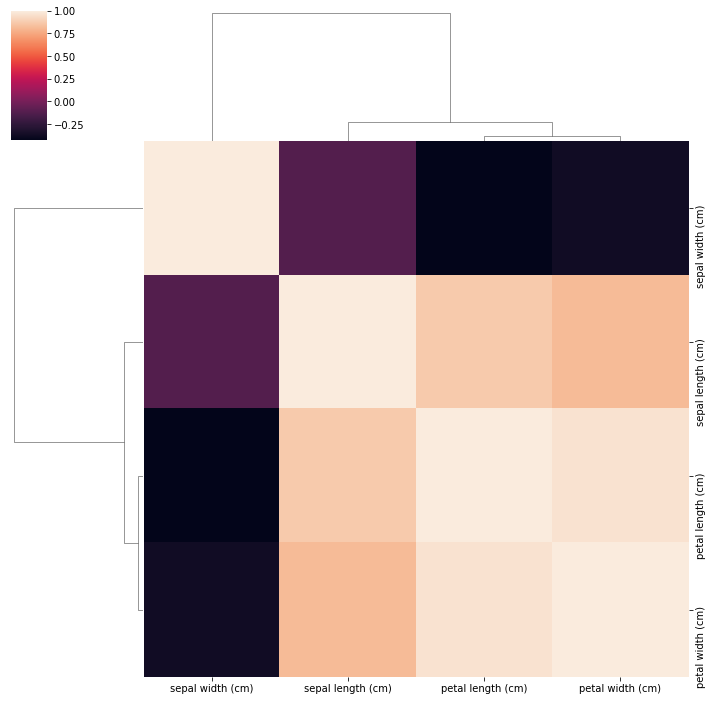

In [ ]:
sb.clustermap(iris_corr)

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_df.drop('iris', axis=1),
                                                    iris_df['iris'],
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
skb = SelectKBest(k=3)

In [ ]:
X_train = pd.DataFrame(
    skb.fit_transform(
        X_train, 
        Y_train
    ),
    columns=skb.get_feature_names_out()
)
X_train

,sepal length (cm),petal length (cm),petal width (cm)
0,5.5,3.7,1.0
1,6.3,5.1,1.5
2,6.4,5.5,1.8
3,6.6,4.4,1.4
4,7.2,6.1,2.5
...,...,...,...
100,6.1,4.0,1.3
101,4.9,4.5,1.7
102,5.8,1.2,0.2
103,5.8,4.0,1.2


# Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2)

In [ ]:
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2)

In [ ]:
pred = clf.predict(X_test[skb.get_feature_names_out()])

In [ ]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    recall_score
)

In [ ]:
print('Accuracy: ', accuracy_score(Y_test, pred))
print('Precision: ', precision_score(Y_test, pred, average='micro'))
print('Recall: ', recall_score(Y_test, pred, average='micro'))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
